In [1]:
import numpy as np
import pandas as pd
import missingno as msno

# Preprocessing

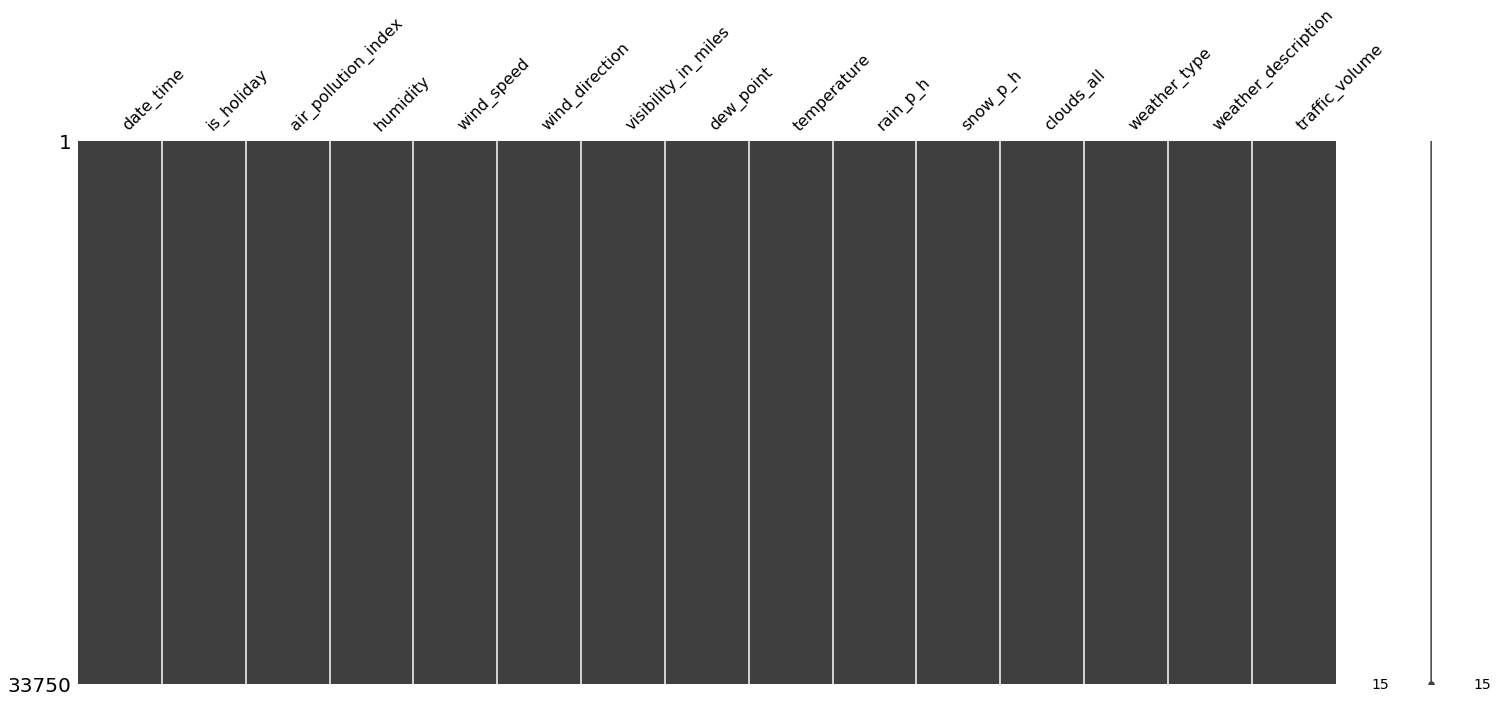

In [19]:
data = pd.read_csv("DataSets/Train.csv")
# Check if there are no missing values
msno.matrix(data)

In [20]:
data["year"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[0])
data["month"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[1])
data["day"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[2])
data["time"] = data["date_time"].apply(lambda x : x.split(" ")[1].split(":")[0])
data["day_of_week"] = pd.DatetimeIndex(data["date_time"].apply(lambda x : x.split(" ")[0])).dayofweek
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,time,day_of_week
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,02,09,1
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,02,10,1
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,02,11,1
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,02,12,1
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,02,13,1


In [21]:
data["snow_p_h"] = data["snow_p_h"].apply(lambda x : 1 if x!=0 else 0)          

data["wind_direction"] = data["wind_direction"].apply(lambda x : x//90)
data["wind_direction"] = data["wind_direction"].apply(lambda x : 0 if x == 4 else x)
data["speed_temp"] = np.sqrt(np.multiply(data["wind_speed"],data["temperature"]))

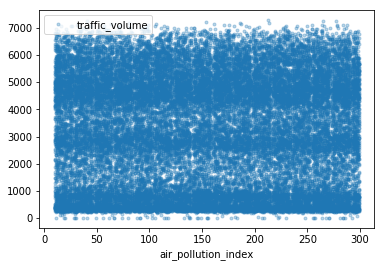

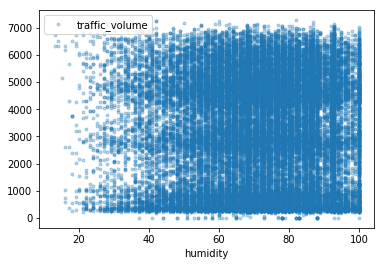

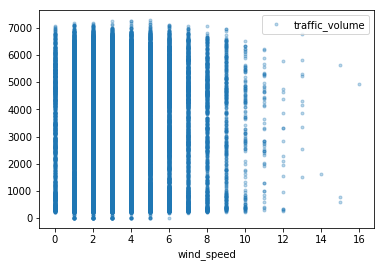

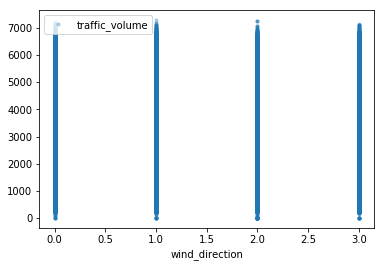

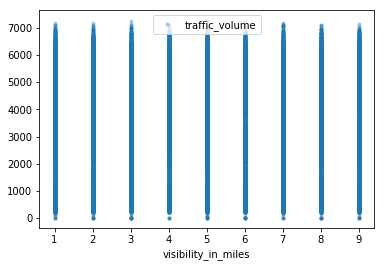

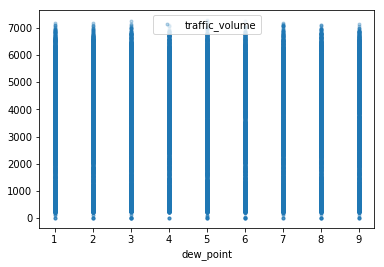

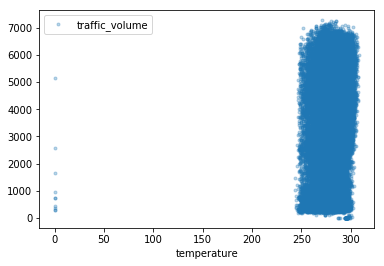

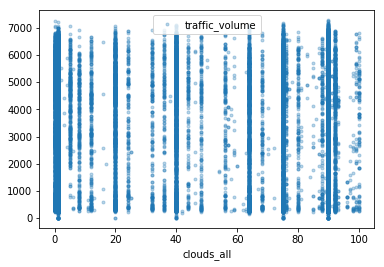

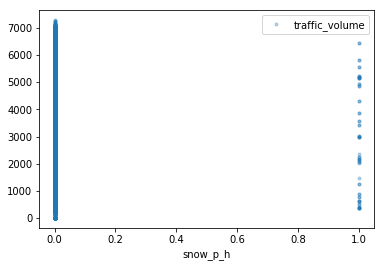

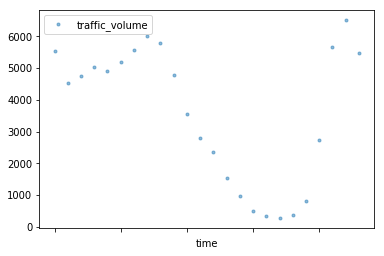

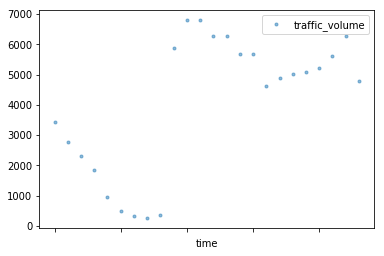

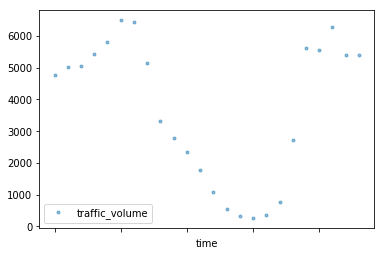

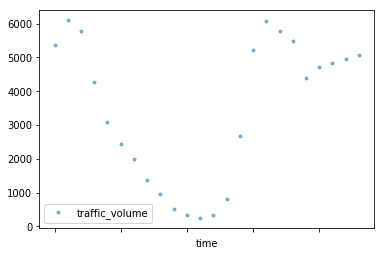

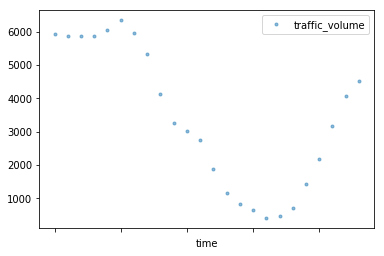

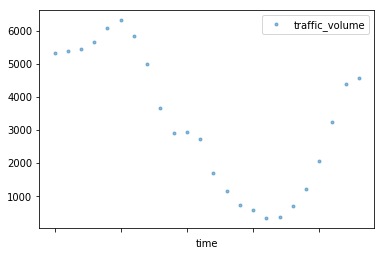

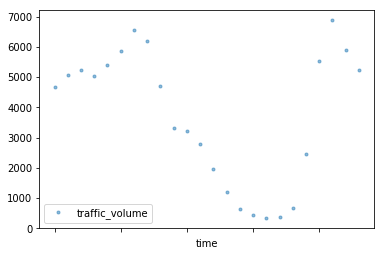

In [22]:
data.plot(x='air_pollution_index', y='traffic_volume', style='.', alpha=.3)
data.plot(x='humidity', y='traffic_volume', style='.', alpha=.3)
data.plot(x='wind_speed', y='traffic_volume', style='.', alpha=.3)
data.plot(x='wind_direction', y='traffic_volume', style='.', alpha=.3)
data.plot(x='visibility_in_miles', y='traffic_volume', style='.', alpha=.3)
data.plot(x='dew_point', y='traffic_volume', style='.', alpha=.3)
data.plot(x='temperature', y='traffic_volume', style='.', alpha=.3)
data.plot(x='clouds_all', y='traffic_volume', style='.', alpha=.3)
data.plot(x='snow_p_h', y='traffic_volume', style='.', alpha=.3)
for i in range(7):
    data[168*i:168*i+24].plot(x='time', y='traffic_volume', style='.', alpha=.5)

In [23]:
time_arr = data["time"].values
c=0
for t in range(len(time_arr)-1):
    if int(time_arr[t+1])==int(time_arr[t]):
#         print(str(t)+" "+str(time_arr[t])+" "+str(time_arr[t+1]))
        c+=1
print(c)

5165


In [24]:
# taking holiday as a feature

for i in range(len(data)):
    if data.at[i,"is_holiday"] != "None":
        d = str(data.at[i,"date_time"].split(" ")[0])
        j=i
        while str(data.at[j,"date_time"].split(" ")[0])==d:
            data.at[j,"is_holiday"] = 1
            j+=1
    else: data.at[i,"is_holiday"] = 0

In [25]:
data = pd.get_dummies(data, columns = ["day_of_week", "month", "wind_direction"], prefix_sep='_', drop_first=True)
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,month_06,month_07,month_08,month_09,month_10,month_11,month_12,wind_direction_1,wind_direction_2,wind_direction_3
0,2012-10-02 09:00:00,0,121,89,2,1,1,288.28,0.0,0,...,0,0,0,0,1,0,0,0,0,1
1,2012-10-02 10:00:00,0,178,67,3,1,1,289.36,0.0,0,...,0,0,0,0,1,0,0,0,0,1
2,2012-10-02 11:00:00,0,113,66,3,2,2,289.58,0.0,0,...,0,0,0,0,1,0,0,0,0,1
3,2012-10-02 12:00:00,0,20,66,3,5,5,290.13,0.0,0,...,0,0,0,0,1,0,0,0,0,1
4,2012-10-02 13:00:00,0,281,65,3,7,7,291.14,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
data = data.drop_duplicates(subset=['date_time', 'traffic_volume'], keep="last")
# data.to_csv("mod_data.csv", index=False)

In [27]:
mod_data = data.drop(columns=["date_time","traffic_volume","weather_description","weather_type","dew_point","visibility_in_miles"])
mod_data.head()

,is_holiday,air_pollution_index,humidity,wind_speed,temperature,rain_p_h,snow_p_h,clouds_all,year,day,...,month_06,month_07,month_08,month_09,month_10,month_11,month_12,wind_direction_1,wind_direction_2,wind_direction_3
0,0,121,89,2,288.28,0.0,0,40,2012,02,...,0,0,0,0,1,0,0,0,0,1
1,0,178,67,3,289.36,0.0,0,75,2012,02,...,0,0,0,0,1,0,0,0,0,1
2,0,113,66,3,289.58,0.0,0,90,2012,02,...,0,0,0,0,1,0,0,0,0,1
3,0,20,66,3,290.13,0.0,0,90,2012,02,...,0,0,0,0,1,0,0,0,0,1
4,0,281,65,3,291.14,0.0,0,75,2012,02,...,0,0,0,0,1,0,0,0,0,1


In [28]:
X = mod_data.values
# np.shape(X)

In [29]:
Y = data["traffic_volume"].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=0)

from xgboost import XGBRegressor
model_xgb = XGBRegressor(
                        gamma=5, 
                        learning_rate=.3,
                        max_depth=15,
                        reg_lambda=100,
                        n_estimators = 500
                        )
                         
model_xgb.fit(X_train, Y_train,eval_metric='rmse', verbose = True, eval_set = [(X_test, Y_test)])

y_pred = model_xgb.predict(X_test)

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
print(explained_variance_score(Y_test, y_pred))
print(mean_squared_error(Y_test, y_pred))
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

/home/debjitdbb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[00:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2748.87
[1]	validation_0-rmse:2001.32
[2]	validation_0-rmse:1485.17
[3]	validation_0-rmse:1125.43
[4]	validation_0-rmse:882.97
[5]	validation_0-rmse:719.173
[6]	validation_0-rmse:613.63
[7]	validation_0-rmse:540.233
[8]	validation_0-rmse:496.104
[9]	validation_0-rmse:460.554
[10]	validation_0-rmse:436.472
[11]	validation_0-rmse:419.021
[12]	validation_0-rmse:407.436
[13]	validation_0-rmse:396.273
[14]	validation_0-rmse:387.164
[15]	validation_0-rmse:378.632
[16]	validation_0-rmse:372.116
[17]	validation_0-rmse:365.542
[18]	validation_0-rmse:359.295
[19]	validation_0-rmse:352.417
[20]	validation_0-rmse:347.323
[21]	validation_0-rmse:343.837
[22]	validation_0-rmse:339.855
[23]	validation_0-rmse:335.791
[24]	validation_0-rmse:333.111
[25]	validation_0-rmse:331.438
[26]	validation_0-rmse:328.896
[27]	validation_0-rmse:326.259
[28]	validation_0

[257]	validation_0-rmse:284.864
[258]	validation_0-rmse:284.841
[259]	validation_0-rmse:284.841
[260]	validation_0-rmse:284.842
[261]	validation_0-rmse:284.831
[262]	validation_0-rmse:284.834
[263]	validation_0-rmse:284.826
[264]	validation_0-rmse:284.82
[265]	validation_0-rmse:284.831
[266]	validation_0-rmse:284.85
[267]	validation_0-rmse:284.835
[268]	validation_0-rmse:284.841
[269]	validation_0-rmse:284.838
[270]	validation_0-rmse:284.822
[271]	validation_0-rmse:284.825
[272]	validation_0-rmse:284.815
[273]	validation_0-rmse:284.837
[274]	validation_0-rmse:284.838
[275]	validation_0-rmse:284.82
[276]	validation_0-rmse:284.819
[277]	validation_0-rmse:284.789
[278]	validation_0-rmse:284.786
[279]	validation_0-rmse:284.786
[280]	validation_0-rmse:284.781
[281]	validation_0-rmse:284.781
[282]	validation_0-rmse:284.791
[283]	validation_0-rmse:284.798
[284]	validation_0-rmse:284.786
[285]	validation_0-rmse:284.773
[286]	validation_0-rmse:284.769
[287]	validation_0-rmse:284.751
[288]	valid

In [31]:
test_data = pd.read_csv("DataSets/Test.csv")

In [32]:
test_data["year"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[0])
test_data["month"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[1])
test_data["day"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[2])
test_data["time"] = test_data["date_time"].apply(lambda x : x.split(" ")[1].split(":")[0])
test_data["day_of_week"] = pd.DatetimeIndex(test_data["date_time"].apply(lambda x : x.split(" ")[0])).dayofweek


test_data["snow_p_h"] = test_data["snow_p_h"].apply(lambda x : 1 if x!=0 else 0)

test_data["wind_direction"] = test_data["wind_direction"].apply(lambda x : x//90)
test_data["wind_direction"] = test_data["wind_direction"].apply(lambda x : 0 if x == 4 else x)
test_data["speed_temp"] = np.sqrt(np.multiply(test_data["wind_speed"],test_data["temperature"]))


In [33]:
for i in range(len(test_data)):
    if test_data.at[i,"is_holiday"] != "None":
        d = str(test_data.at[i,"date_time"].split(" ")[0])
        j=i
        while str(test_data.at[j,"date_time"].split(" ")[0])==d:
            test_data.at[j,"is_holiday"] = 1
            j+=1
    else: test_data.at[i,"is_holiday"] = 0

In [34]:
test_data = pd.get_dummies(test_data, columns = ["day_of_week","month","wind_direction"], prefix_sep='_', drop_first=True)


# test_data["wind_speed_sq"] = test_data["wind_speed"].apply(lambda x:x**0.5)

test_mod_data = test_data.drop(columns=["date_time","weather_description","weather_type","dew_point","visibility_in_miles"])

test_X = test_mod_data.values

In [35]:
pred_y = model_xgb.predict(test_X)

In [36]:
for i in range(len(pred_y)):
    if pred_y[i]<=0:
        sum = 0
        for j in range(10):
            sum = sum + pred_y[i-24*j]
        pred_y[i] = sum/10

In [37]:
submission = pd.DataFrame(columns = ["date_time","traffic_volume"])
submission["date_time"] = test_data["date_time"]
submission["traffic_volume"] = pred_y

In [38]:
submission.to_csv("submission.csv",index = False)